In [1]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

Find the homography matrix that transforms image1 to image 2 and plot the results

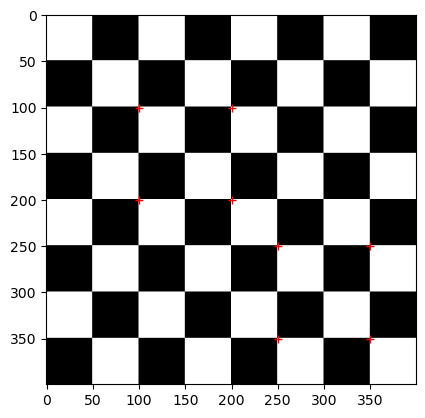

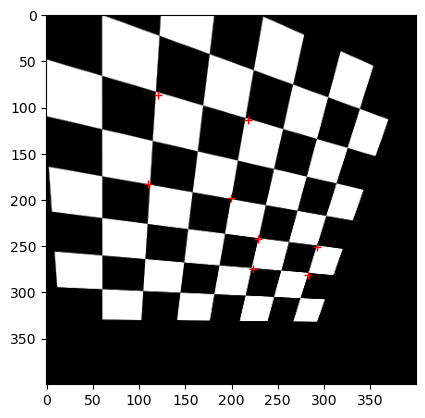

In [7]:
image1 = cv2.imread('../data/images/checkerboard1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('../data/images/checkerboard2.png', cv2.IMREAD_GRAYSCALE)

pts1 = np.array([[100, 100],[100, 200], [200, 100], [200,200], 
                 [250, 250],[250, 350], [350, 250], [350,350]])
pts2 = np.array([(120, 86), (218, 114), (110, 183), (199, 198),
                (229, 242), (292, 251), (223, 275), (283, 281)])

plt.imshow(image1, cmap='gray')
plt.plot(pts1[:,0], pts1[:,1],'r+')
plt.show()
plt.imshow(image2, cmap='gray')
plt.plot(pts2[:,0], pts2[:,1],'r+')

In [138]:
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, ransacReprojThreshold=5)

H

array([[ 2.55298810e-02,  1.62115220e+00, -6.85751445e+00],
       [ 1.54770362e+00,  5.63854420e-01, -9.93365802e+01],
       [ 1.47881623e-03,  1.61847626e-03,  1.00000000e+00]])

In [91]:
pts1 = pts1.astype(np.float32)
pts2 = pts2.astype(np.float32)


H = cv2.getPerspectiveTransform(pts1[4:], pts2[4:])

H

array([[ 1.29416342e-01,  1.41898833e+00, -1.99883268e+01],
       [ 8.07237354e-01,  4.95875486e-01,  6.21750973e+01],
       [ 1.01167315e-03,  1.40077821e-03,  1.00000000e+00]])

In [99]:
# pts11 = np.row_stack((pts1.T, np.ones(pts1.T.shape[1]))).T

pts2_ = cv2.perspectiveTransform(pts1.reshape(-1,1,2), H)
# pts2_.reshape(-1,2)

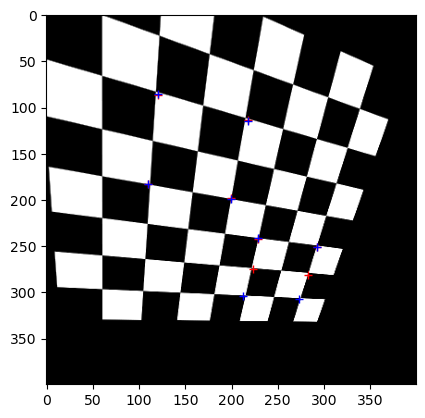

In [100]:
plt.imshow(image2, cmap='gray')
plt.plot(pts2[:,0], pts2[:,1],'r+')
plt.plot(pts2_[:,:,0].T, pts2_[:,:,1].T,'b+')
plt.show()

In [139]:
mask[mask == 1] = True
mask[mask == 0] = False
mask = mask.astype(bool)
mask = np.hstack((mask,mask))
print(pts1[mask])
print(pts1)
mask.shape

[100. 100. 100. 200. 200. 100. 200. 200. 250. 250. 250. 350.]
[[100. 100.]
 [100. 200.]
 [200. 100.]
 [200. 200.]
 [250. 250.]
 [250. 350.]
 [350. 250.]
 [350. 350.]]


(8, 2)

In [127]:
pts1.shape

(8, 2)

In [136]:
mask.shape

(16, 1)